In [1]:
from ensembles import VanillaEnsemble
from datasets import make_dataset, make_cross_validation_dataset
from plot import plot_dataset, plot_prediction
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 4]
from evaluation import evaluate_model

# Preparations

In [2]:
num_epochs = 100
params = {'num_neurons':[10,10,10],'num_epochs':num_epochs,'learning_rate':0.001,'seed':42}


In [3]:
data = make_dataset(train_p=0.8)

X = data['X']
y = data['y']
X_test = data['X_test']
y_test = data['y_test']
generate_sinoid = data['generating']
#sorted_index = data['train_index']
sorted_index = data['shuffle_index']
#test_index = data['test_ind']

In [4]:
#X_test[:10],X[:10]

In [5]:
#len(X), len(sorted_index),len(data['test_ind']),len(X_test)

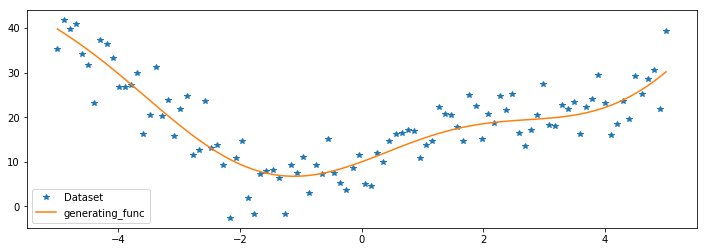

In [6]:
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

# initialise Networks

In [7]:
from estimators import GaussianLossEstimator,GaussianLearningRateEstimator

gauss = GaussianLossEstimator(**params)
gauss_lr = GaussianLearningRateEstimator(**params)

In [8]:
gauss_preds = gauss.predict(X)
gauss_var = gauss.predict_var(X)



lr_preds = gauss_lr.predict(X)
lr_var = gauss_lr.predict_var(X)

In [9]:
lr_var.shape,len(X), lr_preds.shape

((100, 1), 100, (100, 1))

In [10]:
sorted_index.shape

(100,)

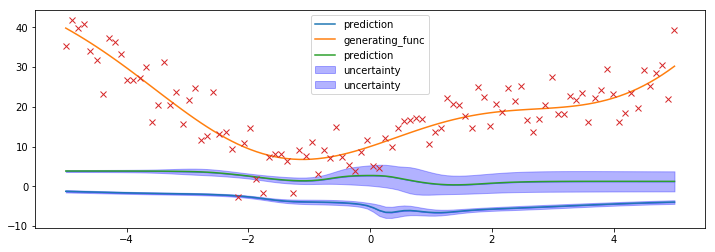

In [11]:
plot_prediction(X,
                gauss_preds,
                sorted_index,
                gauss_var,
                generating_func=generate_sinoid)
plot_prediction(X,
                lr_preds,
                sorted_index,
                lr_var)
plt.plot(X,y,'x')

In [12]:
evaluate_model(X,y,gauss_preds)

RSME is 24.460723065939632


In [13]:
evaluate_model(X,y,lr_preds)

RSME is 19.095685290885562


# Training


In [14]:
gauss.train(X,y)
gauss_lr.train(X,y)

In [15]:
gauss_preds = gauss.predict(X)
gauss_var = gauss.predict_var(X)

lr_preds = gauss_lr.predict(X)
lr_var = gauss_lr.predict_var(X)

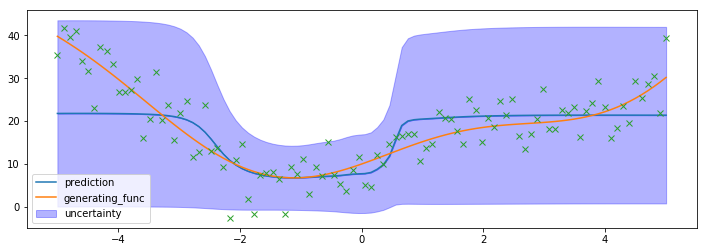

In [16]:
plot_prediction(X,gauss_preds,sorted_index,gauss_var,generating_func=generate_sinoid)
plt.plot(X,y,'x')

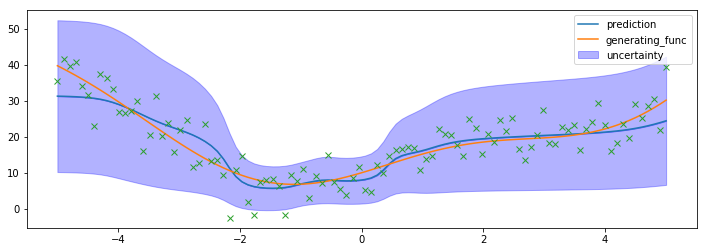

In [17]:
plot_prediction(X,lr_preds,sorted_index,lr_var,generating_func=generate_sinoid)
plt.plot(X,y,'x')

In [18]:
evaluate_model(X,y,gauss_preds,var=gauss_var)

RSME is 6.632808383812808
COVERAGE PROBABILITY is 0.97


In [19]:
evaluate_model(X,y,lr_preds,var=lr_var)

RSME is 4.872248226075592
COVERAGE PROBABILITY is 0.96
